<a href="https://www.kaggle.com/code/williamervin7/crimes-in-chicago-eda?scriptVersionId=239458356" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/crimes-in-chicago-cleaning/__results__.html
/kaggle/input/crimes-in-chicago-cleaning/__notebook__.ipynb
/kaggle/input/crimes-in-chicago-cleaning/__output__.json
/kaggle/input/crimes-in-chicago-cleaning/crimes_filtered.csv
/kaggle/input/crimes-in-chicago-cleaning/custom.css


In [2]:
#read in the clean data frame
df = pd.read_csv('/kaggle/input/crimes-in-chicago-cleaning/crimes_filtered.csv', index_col=0)


In [3]:
df.head()

ID                 Date  IUCR         Primary Type  \
1  4676906  2003-03-01 00:00:00  2825        OTHER OFFENSE   
4  4677901  2003-05-01 01:00:00  0841                THEFT   
6  4791194  2001-01-01 11:00:00  0266  CRIM SEXUAL ASSAULT   
7  4679521  2003-03-15 00:00:00  5007        OTHER OFFENSE   
9  4680124  2003-01-01 00:00:00  0840                THEFT   

                      Description     Location Description  Arrest  Domestic  \
1         HARASSMENT BY TELEPHONE                RESIDENCE   False      True   
4  FINANCIAL ID THEFT:$300 &UNDER                RESIDENCE   False     False   
6                       PREDATORY                RESIDENCE    True      True   
7         OTHER WEAPONS VIOLATION  RESIDENCE PORCH/HALLWAY   False     False   
9   FINANCIAL ID THEFT: OVER $300                RESIDENCE   False     False   

   Beat  District  Ward  Community Area FBI Code  Year   Latitude  Longitude  \
1   935       9.0  11.0            61.0       26  2003  41.817229 -87.637328   
4  2233      22.0  34.0            49.0       06  2003  41.691785 -87.635116   
6   531       5.0   9.0            50.0       02  2001  41.687020 -87.608445   
7  2222      22.0  21.0            73.0       26  2003  41.729712 -87.653159   
9  1134      11.0  24.0            29.0       06  2003  41.869772 -87.708180   

                        Location Watch     FBI Description    Month  
1  (41.817229156, -87.637328162)   2nd  All Other Offenses    March  
4  (41.691784636, -87.635115968)   2nd       Larceny/Theft      May  
6   (41.687020002, -87.60844523)   3rd       Forcible Rape  January  
7  (41.729712374, -87.653158513)   2nd  All Other Offenses    March  
9  (41.869772159, -87.708180162)   2nd       Larceny/Theft  January

In [4]:
df.dtypes

ID                        int64
Date                     object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
Year                      int64
Latitude                float64
Longitude               float64
Location                 object
Watch                    object
FBI Description          object
Month                    object
dtype: object

# Trend of arrest from 2001-2016

In [5]:
#create a seies with the index year and the value of arrest count
years = df[df['Arrest']].groupby('Year').size().reset_index(name='Arrest Count')
print(years)


    Year  Arrest Count
0   2001        141191
1   2002        136624
2   2003        140294
3   2004        116118
4   2005        140230
5   2006        134660
6   2007        131696
7   2008        108134
8   2009        108807
9   2010        100104
10  2011         96094
11  2012         90450
12  2013         86042
13  2014         78038
14  2015         68317
15  2016         48221


## 📉 Arrest Trends in Chicago (2001–2016)
An analysis of arrest data from 2001 to 2016 shows a steady decline in the number of arrests made each year in Chicago:

* In 2001, there were over 141,000 arrests, while by 2016, the number had dropped to just over 48,000.

* This represents a 66% decrease in arrests over the 16-year period.

* The trend appears consistent year-over-year, with especially sharp declines observed after 2010.

This may reflect changes in policing strategy, policy reforms, or broader shifts in crime reporting and enforcement practices.

The chart below visualizes this downward trend in annual arrests.

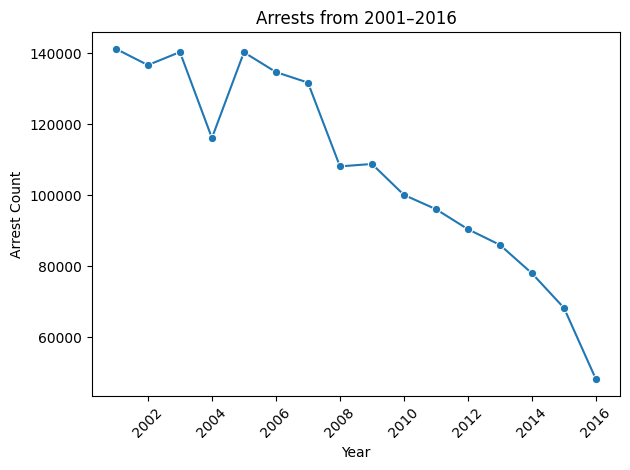

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


g = sns.lineplot(data=years, x='Year', y='Arrest Count',marker='o')
g.set_title('Arrests from 2001–2016')
g.set_xlabel('Year')
g.set_ylabel('Arrest Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Crimes per year

In [7]:
total_years = df.groupby('Year').size().reset_index(name='Crime Count')
print(total_years)

    Year  Crime Count
0   2001       482851
1   2002       471416
2   2003       471067
3   2004       384891
4   2005       449919
5   2006       445541
6   2007       435683
7   2008       419990
8   2009       386030
9   2010       368612
10  2011       350660
11  2012       334429
12  2013       304270
13  2014       269331
14  2015       259612
15  2016       250732
16  2017           30


## 📉 Total Crimes by Year (2001–2017)
The chart below illustrates the total number of reported crimes in Chicago from 2001 to 2017.

* Peak Crime Year: 2001 recorded the highest number of crimes, totaling over 480,000 incidents.

* Steady Decline: From 2001 to 2016, there is a clear downward trend in reported crimes, dropping by nearly half to around 250,000 incidents.

* Data Note: The year 2017 shows an unusually low count (only 30 records), which suggests the dataset for that year is incomplete or truncated. It should likely be excluded from year-over-year analysis.

This trend mirrors the reduction seen in arrest counts, indicating both a decrease in reported crimes and law enforcement actions over time.

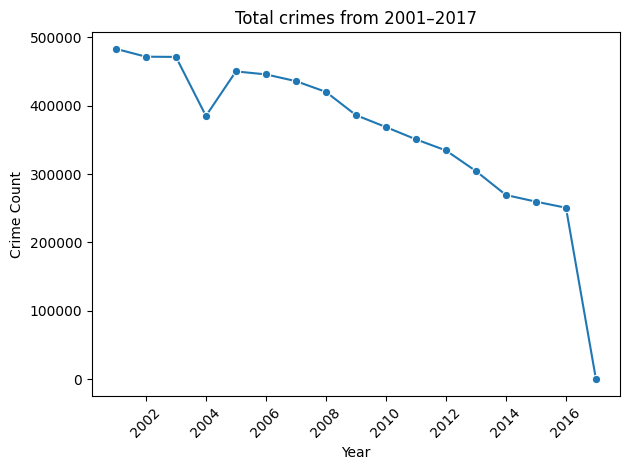

In [8]:
g = sns.lineplot(data=total_years, x='Year', y='Crime Count',marker='o')
g.set_title('Total crimes from 2001–2017')
g.set_xlabel('Year')
g.set_ylabel('Crime Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Crimes per month (seasonality)

In [9]:
total_months = df.groupby('Month').size().sort_values(ascending=False).reset_index(name='Crime Count')
print(total_months)

        Month  Crime Count
0        July       574404
1      August       568034
2        June       546120
3         May       541479
4     October       539773
5   September       533869
6    November       484031
7       March       476843
8     January       476143
9       April       475323
10   December       455430
11   February       413615


## 🔍 Monthly Crime Distribution
This bar chart visualizes the total number of crimes reported in each month across the dataset:

* Summer months (June, July, August) had the highest crime rates, with July leading at 574,404 incidents.

* May through October also show elevated counts, suggesting warmer months may correlate with increased criminal activity.

* February had the lowest number of crimes (413,615), followed by December.

The trend may indicate seasonal patterns in crime, potentially influenced by weather, holidays, or social activity levels.

Understanding this distribution is useful for law enforcement planning, community awareness, and resource allocation.

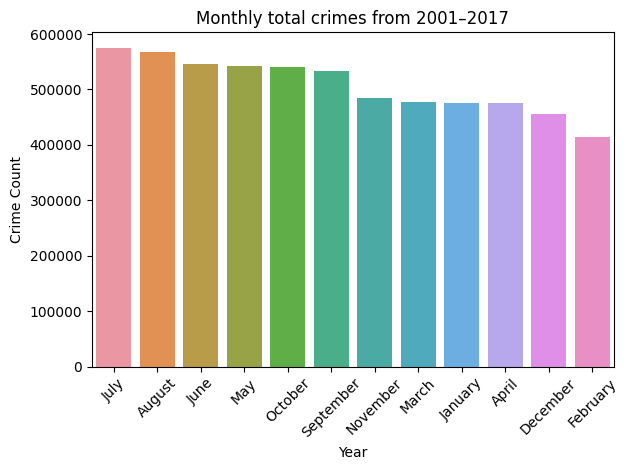

In [10]:
g = sns.barplot(data=total_months, x='Month', y='Crime Count')
g.set_title('Monthly total crimes from 2001–2017')
g.set_xlabel('Year')
g.set_ylabel('Crime Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top Crime Types
We will use the FBI Description for the types of crime

In [11]:
Crime_type = df.groupby('FBI Description').size().sort_values(ascending=False).reset_index(name='Crime Count').head(10)
print(Crime_type)

         FBI Description  Crime Count
0          Larceny/Theft      1264298
1       Assault (Simple)       954799
2              Vandalism       704012
3     All Other Offenses       626069
4  Drug Abuse Violations       621909
5               Burglary       358539
6    Motor Vehicle Theft       286811
7         Other Assaults       281810
8                Robbery       230861
9                  Fraud       175744


## 🔍 Top 10 FBI Crime Categories
This bar chart highlights the ten most frequently reported crimes based on FBI classification:

* Larceny/Theft is by far the most common offense, totaling 1,264,298 incidents, followed by Simple Assault with 954,799 cases.

* Vandalism, All Other Offenses, and Drug Abuse Violations also show high volumes, each with over 600,000 reported cases.

* Serious property crimes such as Burglary and Motor Vehicle Theft remain prevalent, though to a lesser extent.

* Fraud and Robbery round out the list, still reflecting substantial public safety concerns.

This breakdown provides a clear picture of crime prevalence across categories and can help prioritize prevention strategies and law enforcement resources.

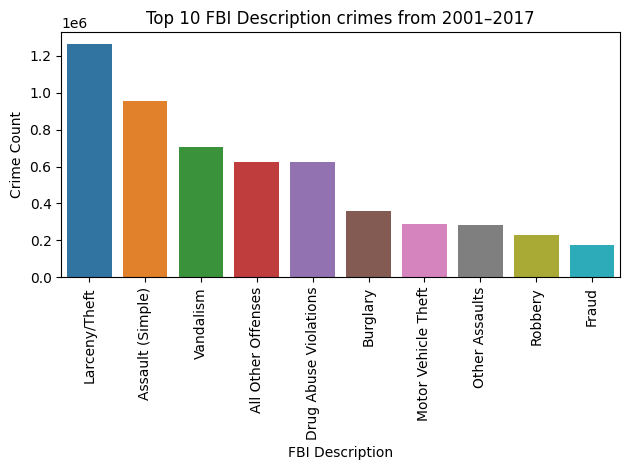

In [12]:
g = sns.barplot(data=Crime_type, x='FBI Description', y='Crime Count')
g.set_title('Top 10 FBI Description crimes from 2001–2017')
g.set_xlabel('FBI Description')
g.set_ylabel('Crime Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Let's look a the trend of Larceny/Theft, Assault (Simple) and Vandalism over time

In [13]:
#create a data frame of the top 3 crimes for analysis
top_three = df[df['FBI Description'].isin(['Larceny/Theft','Assault (Simple)','Vandalism'])]

## Top 3 Crime Types Over Time (2001–2017)
The line chart below displays the yearly trends for the top three most common crime categories: Larceny/Theft, Assault (Simple), and Vandalism. Each line represents one of the crime types, showing how their frequencies have changed across the years.

* Larceny/Theft consistently recorded the highest number of cases, although it has shown a gradual decline over time.

* Assault (Simple) followed a similar declining trend, though at a lower volume.

* Vandalism also decreased steadily, particularly after 2008.

This visualization highlights a general downward trend in these major crime categories, which aligns with broader decreases in total crime across Chicago during the same period.

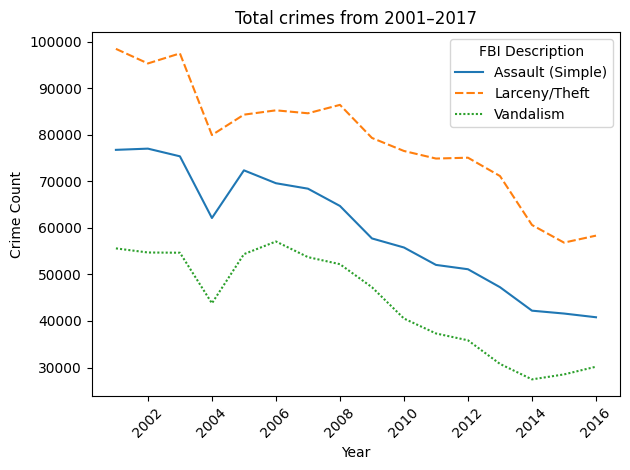

In [14]:
Crime_type = top_three.groupby(['Year','FBI Description']).size().reset_index(name='Crime Count')

g = sns.lineplot(data=Crime_type, x='Year', y='Crime Count',style='FBI Description',hue='FBI Description')
g.set_title('Total crimes from 2001–2017')
g.set_xlabel('Year')
g.set_ylabel('Crime Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Since Crime has gone down a lot from 2001-2017 lets focus only on the last 5 years of the data set

In [15]:
df2 = df[df['Year']>2010]

# Location-Based Insights

In [16]:
top_districts = df2.groupby('District').size().sort_values(ascending=False).reset_index(name='Crime Count').head(10)
print(top_districts)

   District  Crime Count
0      11.0       121468
1       8.0       119498
2       6.0       105292
3       4.0       104926
4       7.0       103365
5      25.0       102516
6       3.0        89919
7       9.0        87557
8      12.0        84292
9      10.0        79644


## Top Districts by Crime Count (2011–2017)
To better understand recent crime distribution, we filtered the dataset to only include crimes that occurred after 2010. The bar chart below displays the top 10 police districts with the highest number of reported crimes between 2011 and 2017. Districts 11, 8, and 6 had the highest crime counts in this period, suggesting these areas may benefit most from targeted interventions and increased resources.

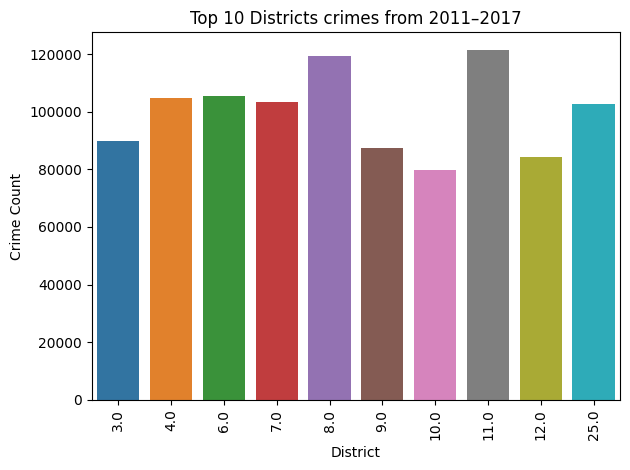

In [17]:
g = sns.barplot(data=top_districts, x='District', y='Crime Count')
g.set_title('Top 10 Districts crimes from 2011–2017')
g.set_xlabel('District')
g.set_ylabel('Crime Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Filtering for Location-Based Crime Visualization

To create efficient and meaningful location-based visualizations, we filtered the dataset using the following criteria:

- **Year 2016**: Focusing on recent years to capture current crime patterns while keeping the dataset manageable.
- **Districts 11, 8, and 6**: These are the top three districts with the highest crime counts based on earlier analysis.
- **Top Crime Types**: We selected the most frequent crimes — *Larceny/Theft*, *Assault (Simple)*, and *Vandalism* — to highlight common offenses in each area.



In [18]:
df_filtered = df[
    (df['Year']==2016) &
    (df['District'].isin([11.0, 8.0, 6.0])) &
    (df['FBI Description'].isin(['Larceny/Theft', 'Assault (Simple)', 'Vandalism']))
]

### 📊 Top Crimes in the Top 3 Districts (2016)
This bar plot shows the distribution of the top 3 crime types — Assault (Simple), Larceny/Theft, and Vandalism — across the three districts with the highest overall crime rates in 2016 (Districts 6, 8, and 11):

* District 6:
Assault (Simple) was the most reported crime, followed by Larceny/Theft and Vandalism.

* District 8:
Larceny/Theft led in volume, followed by Assault and Vandalism.

* District 11:
Assault (Simple) was the most frequent, with Larceny/Theft and Vandalism trailing behind.

📌 Notably:

* District 8 had the highest count of Larceny/Theft.

* District 11 had the highest count of Assaults.

This breakdown helps highlight how different crime types dominate in different areas, which can guide targeted crime prevention strategies.

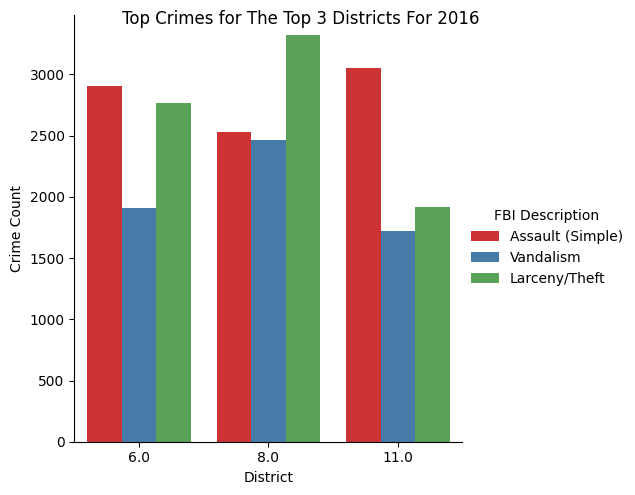

In [19]:

g = sns.catplot(data=df_filtered, x='District', kind='count', hue='FBI Description', palette=sns.color_palette('Set1'))
g.fig.suptitle('Top Crimes for The Top 3 Districts For 2016')
g.set_axis_labels('District', 'Crime Count')


# Analize crime by Watch
Since Crime has gone down a lot from 2001-2017 lets focus only on the last 5 years of the data set

### Crime Distribution by Police Watch
The chart below shows the distribution of reported crimes by police watch shift. The 1st Watch (2:00 PM – 12:01 AM) has the highest crime count by a significant margin, followed by the 3rd Watch (6:00 AM – 4:00 PM). The 2nd Watch (10:00 PM – 8:00 AM) sees the least crime activity. This insight may help inform decisions around resource allocation and patrol scheduling for each shift.

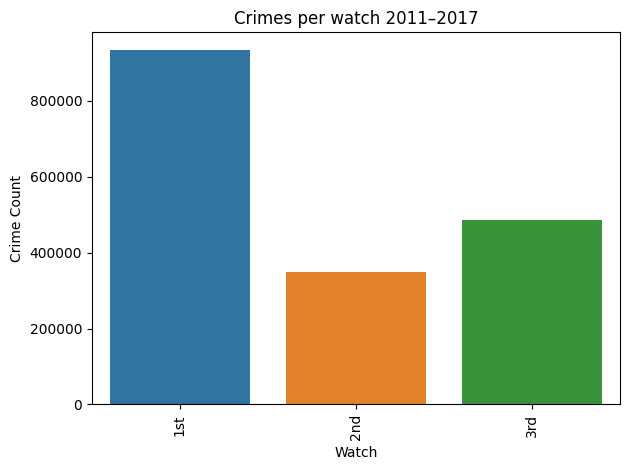

In [21]:
# Create a count plot of Watch
g = sns.countplot(x='Watch', data=df2)
g.set_title('Crimes per watch 2011–2017')
g.set_xlabel('Watch')
g.set_ylabel('Crime Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
#Display plot
plt.show()

## 📊 Analyzing Top 10 Crimes per Police Watch
To explore which types of crimes are most common during each police shift (or "watch"), we created a reusable function called watch_crimes(). This function:

* Filters the dataset based on the selected watch (1st, 2nd, or 3rd).

* Groups and counts crimes by their FBI description.

* Displays the top 10 crime types for that watch.

* Visualizes the results using a treemap, offering a compact and intuitive view of crime distribution.

This analysis helps identify which types of criminal activity are most frequent during specific police shifts, supporting more strategic resource allocation.

In [22]:
def watch_crimes(df, watch):
    # Filter and summarize
    top_crimes = (
        df[df['Watch'] == watch]
        .groupby('FBI Description')
        .size()
        .sort_values(ascending=False)
        .reset_index(name='Crime Count')
        .head(10)
    )

    # Output
    print(f"Top 10 crimes for {watch} watch")
    print(top_crimes)

    # Plotting
    import squarify
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    squarify.plot(
        sizes=top_crimes['Crime Count'], 
        label=top_crimes['FBI Description'], 
        alpha=0.8
    )
    plt.title(f"Top 10 Crime Types – {watch} Watch")
    plt.axis('off')
    plt.show()


## 🔍 Top 10 Crimes During the 1st Watch (2:00 PM – 12:01 AM)
The chart below highlights the top 10 most frequently reported crimes during the 1st watch in Chicago. This time frame captures afternoon through late evening activity, a period where certain crime types tend to spike.

* Larceny/Theft is the most common offense, with over 208,000 incidents.

* Assault (Simple) and Drug Abuse Violations also appear prominently, indicating frequent interpersonal and substance-related offenses.

* Property crimes like Vandalism, Burglary, and Motor Vehicle Theft are heavily represented.

* Lesser, though still significant, occurrences include Robbery and Fraud.

This distribution offers insights into what types of crimes dominate the late afternoon to midnight period, which can help guide policing strategies for this shift.

Top 10 crimes for 1st watch
         FBI Description  Crime Count
0          Larceny/Theft       208755
1       Assault (Simple)       142614
2  Drug Abuse Violations       103628
3              Vandalism       100328
4     All Other Offenses        86790
5         Other Assaults        45573
6               Burglary        44264
7    Motor Vehicle Theft        43739
8                Robbery        38649
9                  Fraud        26974


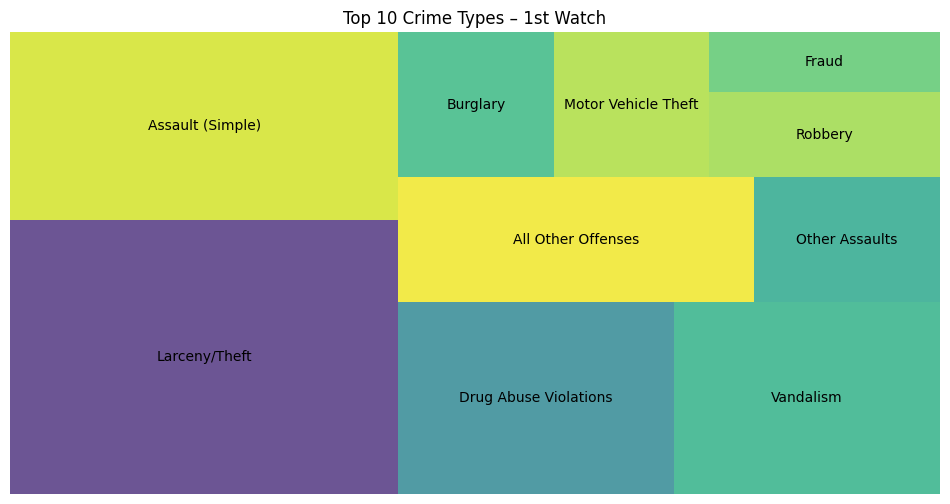

In [23]:
watch_crimes(df2,'1st')

## 🌙 Top 10 Crimes During the 2nd Watch (10:00 PM – 8:00 AM)
The chart and data below display the most common crimes reported during the overnight shift, when visibility is lower and activity patterns shift:

* Assault (Simple) tops the list with over 68,000 reported cases, followed closely by Larceny/Theft, indicating continued personal and property threats during nighttime hours.

* Crimes such as Vandalism, Burglary, and Motor Vehicle Theft remain significant, suggesting opportunistic offenses under the cover of darkness.

* Drug Abuse Violations and Robbery are also notable, though their counts are lower compared to the 1st watch.

* Interestingly, both Simple Assault and Fraud maintain a visible presence during this shift.

This data helps illustrate which offenses require closer attention during late-night patrols and early morning hours.

Top 10 crimes for 2nd watch
         FBI Description  Crime Count
0       Assault (Simple)        68851
1          Larceny/Theft        66057
2              Vandalism        50362
3     All Other Offenses        26122
4               Burglary        24425
5    Motor Vehicle Theft        18707
6                Robbery        18519
7  Drug Abuse Violations        13958
8         Simple Assault        13017
9                  Fraud        11907


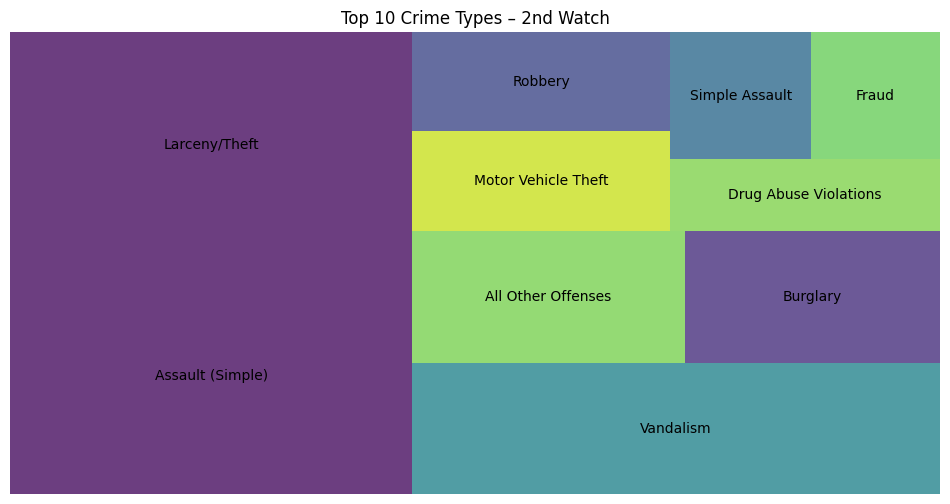

In [24]:
watch_crimes(df2,'2nd')

## 🌤️ Top 10 Crimes During the 3rd Watch (6:00 AM – 4:00 PM)
This chart highlights the most frequently reported crimes during the daytime shift, a period of high civilian activity:

* Larceny/Theft continues to dominate with over 122,000 cases, emphasizing persistent property-related offenses during working hours.

* Assault (Simple) and All Other Offenses follow, showing that both interpersonal and miscellaneous violations remain common in daylight.

* Drug Abuse Violations, Burglary, and Vandalism are also prevalent, suggesting that these offenses aren’t confined to nighttime hours.

* Fraud, Other Assaults, and Motor Vehicle Theft round out the list, reflecting both financial and physical crimes throughout the day.

* Robbery appears less frequent compared to other watches, likely due to increased foot traffic and visibility.

This distribution suggests that although overall crime volume is lower than the 1st watch, the 3rd watch still requires substantial attention for both property and personal crimes.

Top 10 crimes for 3rd watch
         FBI Description  Crime Count
0          Larceny/Theft       122027
1       Assault (Simple)        63566
2     All Other Offenses        53984
3  Drug Abuse Violations        44854
4               Burglary        39596
5              Vandalism        39451
6                  Fraud        30764
7         Other Assaults        25929
8    Motor Vehicle Theft        16793
9                Robbery        12901


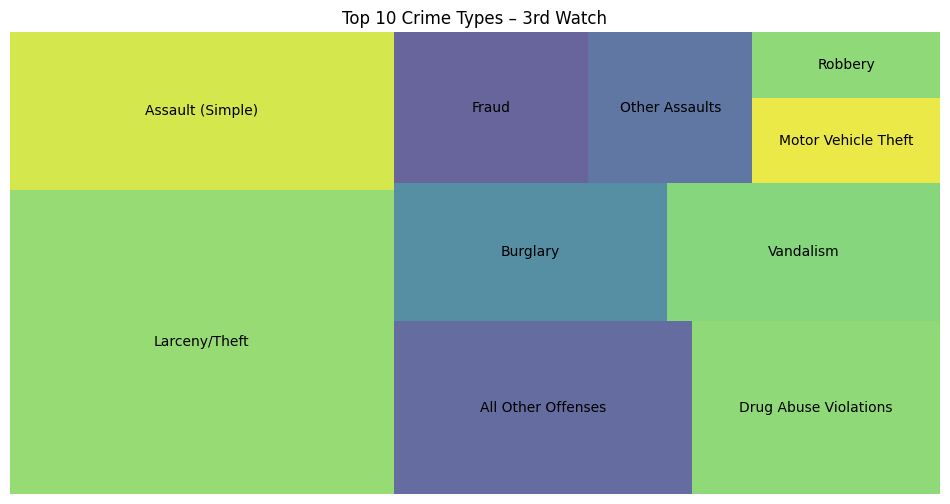

In [25]:
watch_crimes(df2,'3rd')

## 📍 Visualizing Crime Hotspots in Chicago by Month and Watch
To better understand where police resources might be most needed, we created a custom function called chicago_crime() that does the following:

1. Filters the dataset by a selected Month and Watch (shift).

2. Samples 2,000 records to ensure manageable runtime and smooth plotting, while still maintaining meaningful geographic distribution.

3. Counts crimes by district, providing a quick snapshot of the most impacted areas during that time period.

4. Generates a scatter plot to visualize the spatial distribution of crimes across the city using longitude and latitude, with hue based on police districts.

5. Builds an interactive Folium map where each crime is represented by a circle marker. Hovering over a marker reveals the crime type (via FBI Description).

This function allows us to identify high-crime districts and hotspots visually and interactively. It's especially useful for stakeholders looking to make data-driven decisions about patrol allocation or community safety interventions.

In [49]:
import folium
from IPython.display import display
def chicago_crime(m, w):

    # Create filtered data frame 
    df_filtered = df[(df['Month'] == m) & (df['Watch'] == w)].sample(2000)
    district_crimes = df_filtered['District'].value_counts(ascending=False).reset_index(name='Crime Count')
    print(district_crimes)

    # Create a folium map centered around Chicago
    chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=12)

    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_filtered, x='Longitude', y='Latitude', hue='District', palette='Set2', alpha=0.6)
    plt.title(f"Scatter Plot of Crimes in {m} during {w} Watch")
    plt.show()

    # For each point in the scatter plot, create a marker on the map
    for _, row in df_filtered.iterrows():
        folium.CircleMarker(location=[row['Latitude'], row['Longitude']], 
                        radius=5,
                        popup=row['FBI Description'],
                        color='blue', 
                        fill=True, 
                        fill_color='blue', 
                        fill_opacity=0.6).add_to(chicago_map)

    # Display the map
    return chicago_map

### 🔵 1st Watch (2:00 PM – 12:01 AM)
* Top Districts:

    * District 8 – 149 crimes

    * District 7 – 143 crimes

    * District 11 – 140 crimes

* Other notable districts: 25, 3, and 4

📌 Observation:
Crime is heavily concentrated in Districts 8, 7, and 11, suggesting these areas may need stronger afternoon-eveing patrols.

    District  Crime Count
0        8.0          149
1        7.0          143
2       11.0          140
3       25.0          135
4        3.0          117
5        4.0          109
6        6.0          103
7       12.0           96
8        2.0           96
9        5.0           86
10      16.0           85
11      10.0           83
12       9.0           82
13      19.0           81
14      15.0           78
15      17.0           71
16      18.0           66
17      24.0           63
18      22.0           62
19       1.0           60
20      14.0           60
21      20.0           35


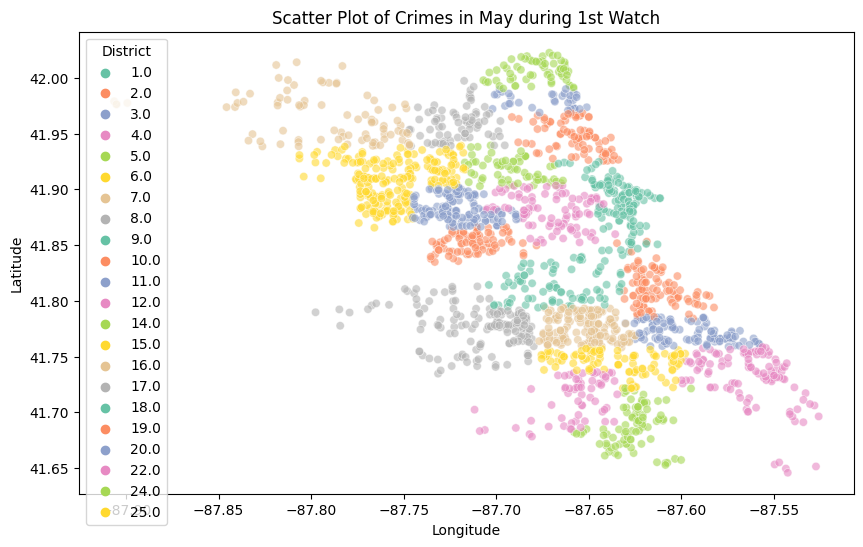

In [50]:
chicago_crime('May','1st')

### 🟡 2nd Watch (10:00 PM – 8:00 AM)
* Top Districts:

    * District 8 – 145 crimes

    * District 6 – 123 crimes

    * District 11 – 118 crimes

* Other notable districts: 4, 7, and 3.

📌 Observation:
District 8 remains a high-crime area across shifts. Night crimes are also high in District 6, which should be prioritized for increased night/early morning visibility.

    District  Crime Count
0        8.0          145
1        6.0          123
2       11.0          118
3        4.0          115
4        7.0          115
5        3.0          109
6       12.0          106
7       25.0          106
8        9.0           99
9        5.0           93
10      18.0           93
11      15.0           91
12       2.0           88
13      10.0           83
14      19.0           82
15      14.0           81
16      16.0           72
17      17.0           71
18      24.0           64
19      22.0           62
20       1.0           42
21      20.0           42


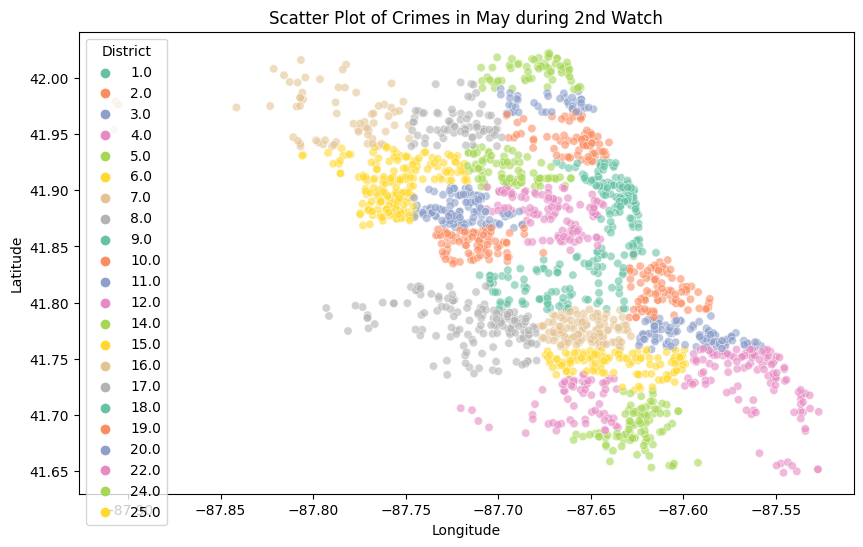

In [51]:
chicago_crime('May','2nd')

### 🔴 3rd Watch (6:00 AM – 4:00 PM)
* Top Districts:

    * District 11 – 139 crimes

    * District 2 – 129 crimes

    * District 25 – 120 crimes

* Other notable districts: 4, 8, 3, and 7.

📌 Observation:
District 11 sees a spike in crime during the 3rd watch, unlike District 8, which drops in ranking slightly. Districts 2 and 25 become higher priorities during this time.

    District  Crime Count
0       11.0          139
1        2.0          129
2       25.0          120
3        4.0          117
4        8.0          111
5        3.0          111
6        7.0          109
7        6.0          109
8       12.0          100
9        9.0           98
10       1.0           97
11       5.0           91
12      15.0           84
13      10.0           81
14      19.0           73
15      14.0           72
16      17.0           72
17      22.0           68
18      18.0           68
19      16.0           57
20      24.0           56
21      20.0           38


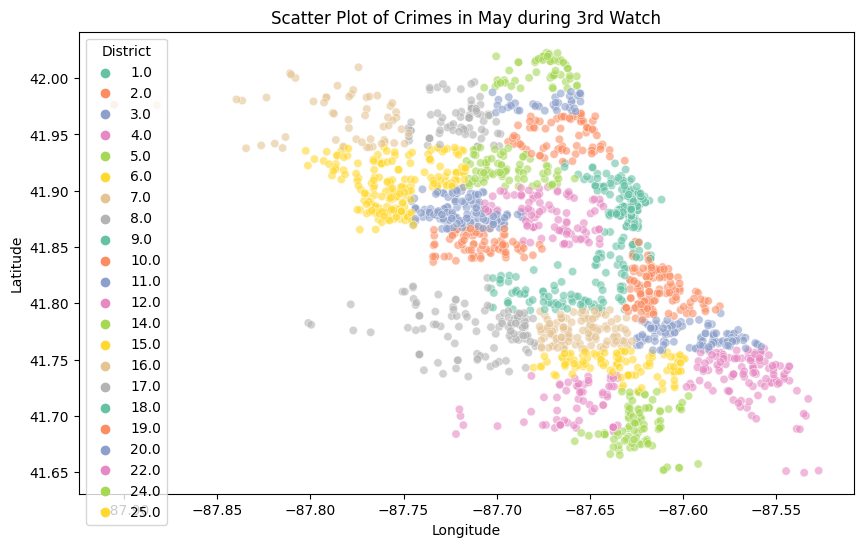

In [52]:
chicago_crime('May','3rd')

### 🚔 Recommendations
1. District 8 requires consistent coverage across 1st and 2nd Watch, especially in the early morning and midday hours.

2. District 11 consistently ranks high across all shifts, with a particular spike during the 3rd Watch. This district should be a priority across all times, especially evenings.

3. District 2 and 25 see increased crime activity during the night shift, making them key targets for evening patrol enhancement.

4. Consider dynamic police deployment where officers are shifted based on temporal crime hotspots observed in these analyses.

5. Further investigation into the types of crimes per district and time could refine strategy (e.g., violent vs. property crimes).

# 🧠 Project Summary: Chicago Crime Analysis (2001–2017)

This project explores crime patterns in Chicago from 2001 to 2017 using a public dataset. It includes trend analysis, seasonal distribution, crime typology, spatial mapping, and temporal patterns across police watch shifts.

## 📈 Key Findings

- **Long-Term Decline**  
  Arrests and total crimes have dropped significantly (~66% decline in arrests from 2001 to 2016), indicating major shifts in law enforcement practices and/or community conditions.

- **Seasonal Peaks**  
  Crime peaks in summer months (especially July) and dips during winter, suggesting weather and public activity levels are major influencers.

- **Top Offenses**  
  Larceny/Theft, Simple Assault, and Vandalism dominate across years and shifts, though the volume of each varies by time and location.

- **District Hotspots**  
  Districts 8, 11, and 6 consistently report the highest crime counts, particularly for Larceny and Assault.

- **Time-Based Watch Trends**
  - **1st Watch (2 PM – 12 AM)** sees the **most crime overall**, driven largely by theft and assault in Districts 8 and 11.
  - **2nd Watch (10 PM – 8 AM)** has fewer incidents, but Assault and property crimes remain prominent, with Districts 8 and 6 leading.
  - **3rd Watch (6 AM – 4 PM)** shifts hotspots toward **Districts 11, 2, and 25**, highlighting different neighborhood patterns during the day.

## 🧭 Geographic and Temporal Insights

Using interactive mapping (Folium) and watch-specific district breakdowns, crime hotspots shift by time of day:

- **District 8** is persistently high across the 1st and 2nd Watches.
- **District 11** becomes the top priority during the 3rd Watch.
- **Districts 2 and 25** emerge as daytime hotspots (3rd Watch) and need attention during working hours.

---

# ✅ Strategic Recommendations

1. **Deploy Dynamic Patrols Based on Watch-Level Hotspots**  
   Allocate officers strategically by time of day: e.g., increase presence in District 11 during the 3rd Watch and District 8 during the 1st and 2nd.

2. **Prioritize Resource Allocation in Top Districts**  
   Focus community programs, patrols, and surveillance in **Districts 8, 11, and 6**, which consistently report high crime counts across multiple shifts.

3. **Enhance Summer Crime Prevention Campaigns**  
   Given the seasonal spike in crime from **May to August**, roll out high-visibility patrols and public safety initiatives during this time.

4. **Tailor Intervention Strategies by Crime Type and Shift**  
   Larceny peaks during working hours (3rd Watch), while Assault and Drug Abuse spike later in the day—enabling **watch-specific crime-prevention strategies**.

5. **Use Crime Data to Drive Community Engagement**  
   Share time- and location-based crime insights with community leaders to build targeted education, reporting, and prevention programs, especially in high-crime neighborhoods.

---
